In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
filename = "profile2.data"
df = pd.read_csv(filename, names=["jiffies", "min_page_flt", "mjr_page_flt", "proc_util"], sep=" ")

In [ ]:
df = df[:-1] # remove last line (summary line)
df["page_flt_sum"] = df["min_page_flt"] + df["mjr_page_flt"].astype(int)
df_sums = df["page_flt_sum"].tolist()
df

In [97]:
def build_xy_axis(filename):
  df1 = pd.read_csv(filename, names=["jiffies", "min_page_flt", "mjr_page_flt", "proc_util"], sep=" ")
  df1 = df1[:-1]
  df1["page_flt_sum"] = df1["min_page_flt"] + df1["mjr_page_flt"].astype(int)

  jiffies = df1["jiffies"].astype(int).tolist()
  
  cumul_page_flt_ct = []
  page_flts = df1["page_flt_sum"].tolist()

  for i in range(len(page_flts)):
    if i == 0:
      cumul_page_flt_ct.append(page_flts[i])
      continue
    
    page_flts[i] = page_flts[i] + page_flts[i-1]
    cumul_page_flt_ct.append(page_flts[i])

  return jiffies, cumul_page_flt_ct


def build_bar_y_axis(filenames):
  proc_utils = []
  for filename in filenames:
    df1 = pd.read_csv(filename, names=["jiffies", "min_page_flt", "mjr_page_flt", "proc_util"], sep=" ")
    df1 = df1[:-1]
    cpu_times = df1["proc_util"].astype(int).tolist()
    jiffies = df1["jiffies"].astype(int).tolist()

    utils_over_jiffies = [cpu_times[i] / (jiffies[i] - jiffies[0] + 1) for i in range(len(cpu_times))]
    proc_utils.append(sum(utils_over_jiffies))

  return proc_utils


def plot_data(x_list, y_list, title, x_label, y_label, c='r'):
  plt.plot(x_list, y_list, c=c)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()


def plot_bar_data(x_list, y_list, title, x_label, y_label):
  plt.bar(x_list, y_list)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

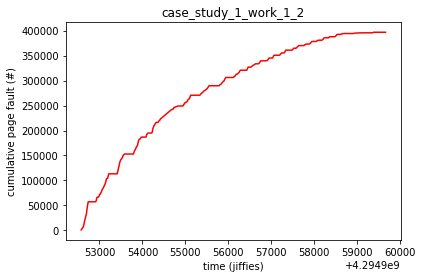

In [79]:
# study 1, work proc 1,2
filename = "profile1.data"
x_axis, y_axis = build_xy_axis(filename)
plot_data(x_axis, y_axis, "case_study_1_work_1_2", "time (jiffies)", "cumulative page fault (#)")

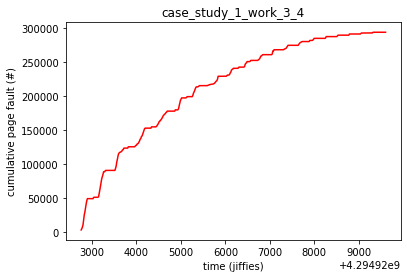

In [93]:
# study 1, work proc 3,4
filename = "profile2.data"
x_axis, y_axis = build_xy_axis(filename)
plot_data(x_axis, y_axis, "case_study_1_work_3_4", "time (jiffies)", "cumulative page fault (#)")

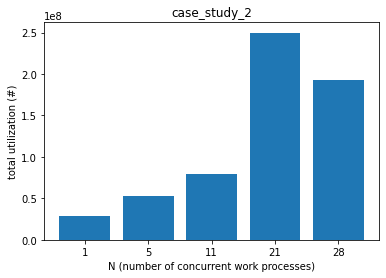

[28584491.204922892,
 52844041.178637736,
 79671977.3178926,
 249895733.61308056,
 192413308.10452834]

In [116]:
# study 2
filenames = ["profile3-1.data", "profile3-11.data", "profile3-5.data", "profile3-21.data"]

x_axis = ["1", "5", "11", "21", "28"]
y_axis = build_bar_y_axis(filenames)
y_axis.append(192413308.10452834)
plot_bar_data(x_axis, y_axis, "case_study_2", "N (number of concurrent work processes)", "total utilization (#)")
y_axis